In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from ipywidgets import interact
import math

In [2]:
%matplotlib inline

In [3]:
mat_data = scipy.io.loadmat('hand_written_digits_data.mat')
data = mat_data['X']
print('Shape of data:', data.shape)

Shape of data: (5000, 400)


In [4]:
mat_weights = scipy.io.loadmat('hand_written_digits_weights.mat')
theta1, theta2 = mat_weights['Theta1'], mat_weights['Theta2']
print('Shape of theta1:', theta1.shape)
print('Shape of theta2:', theta2.shape)

Shape of theta1: (25, 401)
Shape of theta2: (10, 26)


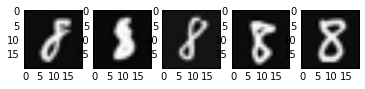

In [5]:
@interact
def show_img(idx=[0, math.floor((np.size(data, axis=0) - 1)/5), 1], inverse_color=False):
    plt.figure()
    num_per_row = 5
    for i in range(num_per_row):
        row = data[idx * num_per_row + i]
        matrix = row.reshape(20, 20).T
        if inverse_color:
            matrix = 1 - matrix
        plt.subplot(1, num_per_row, i + 1)
        plt.imshow(matrix, cmap='Greys_r')
    plt.show()

In [6]:
def get_outputs(features, weights):
    features = np.matrix(features)
    weights = np.matrix(weights)
    features = np.insert(features, 0, 1, axis=1)
    z = features @ weights.T
    return 1 / (1 + np.power(math.e, (-z)))

In [7]:
a2 = get_outputs(data, theta1)

In [8]:
h_theta_x = get_outputs(a2, theta2)

In [14]:
result = np.argmax(h_theta_x, axis=1) + 1
print('Prediction values:', np.unique(list(result.flatten())))
print('Results:', result.T)

Prediction values: [ 1  2  3  4  5  6  7  8  9 10]
Results: [[10 10 10 ...,  9  9  9]]
